In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

stocksymbols = ['BTC-USD']
startdate = date(2020,8,4)
end_date = date.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data


data = getMyPortfolio(stocksymbols)
data

data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

2023-07-19
[*********************100%***********************]  1 of 1 completed


In [9]:


data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2020-08-03,11043.768555,11453.079102,11012.415039,11246.348633,11246.348633,20271713443,NaN,NaN,NaN,NaN
2020-08-04,11246.203125,11385.381836,11094.145508,11205.892578,11205.892578,21250197042,NaN,NaN,NaN,NaN
2020-08-05,11203.823242,11786.617188,11158.285156,11747.022461,11747.022461,24411254471,NaN,NaN,NaN,NaN
2020-08-06,11749.871094,11902.335938,11598.713867,11779.773438,11779.773438,23400740340,NaN,NaN,NaN,NaN
2020-08-07,11778.894531,11898.038086,11408.593750,11601.472656,11601.472656,23132312867,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-13,30387.488281,31814.515625,30268.351562,31476.048828,31476.048828,23686079548,29532.120638,28358.105879,NaN,NaN
2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660,29705.767057,28379.666719,NaN,NaN
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,29863.080794,28402.183379,NaN,NaN


In [10]:
if not data['Buy_Signal_price'].isna().any().any():
    print(data)
else:
    print("missing")

missing


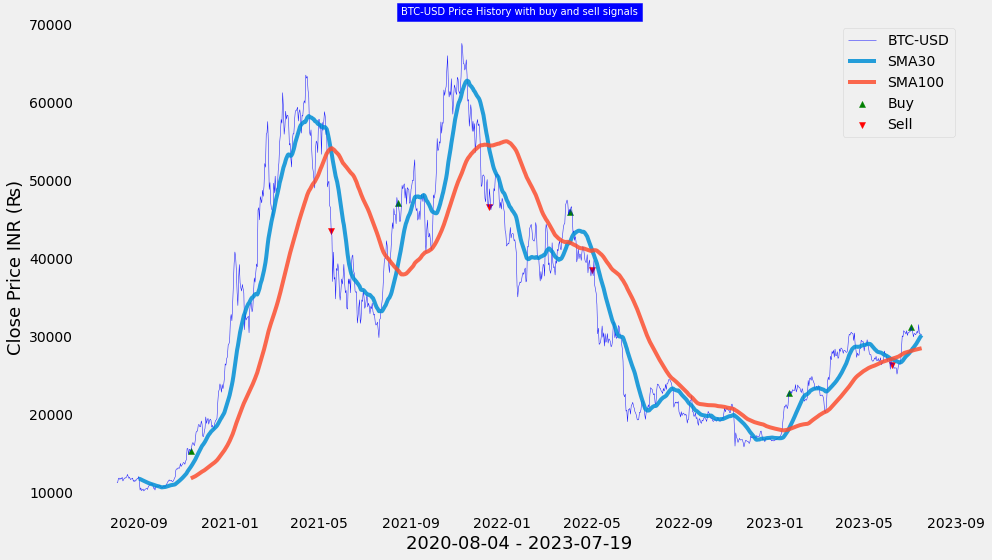

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


In [12]:

macd = ta.macd(data['Close'])

data = pd.concat([data, macd], axis=1).reindex(data.index)


In [13]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [14]:
MACD_strategy = MACD_Strategy(data, 0.025)

MACD_strategy

In [15]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2020-08-03,11043.768555,11453.079102,11012.415039,11246.348633,11246.348633,20271713443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2020-08-04,11246.203125,11385.381836,11094.145508,11205.892578,11205.892578,21250197042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2020-08-05,11203.823242,11786.617188,11158.285156,11747.022461,11747.022461,24411254471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2020-08-06,11749.871094,11902.335938,11598.713867,11779.773438,11779.773438,23400740340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2020-08-07,11778.894531,11898.038086,11408.593750,11601.472656,11601.472656,23132312867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-13,30387.488281,31814.515625,30268.351562,31476.048828,31476.048828,23686079548,29532.120638,28358.105879,NaN,NaN,635.060970,-70.864442,705.925411,NaN,NaN,True
2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660,29705.767057,28379.666719,NaN,NaN,574.364949,-105.248370,679.613319,NaN,NaN,False
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,29863.080794,28402.183379,NaN,NaN,517.213401,-129.919935,647.133335,NaN,NaN,False


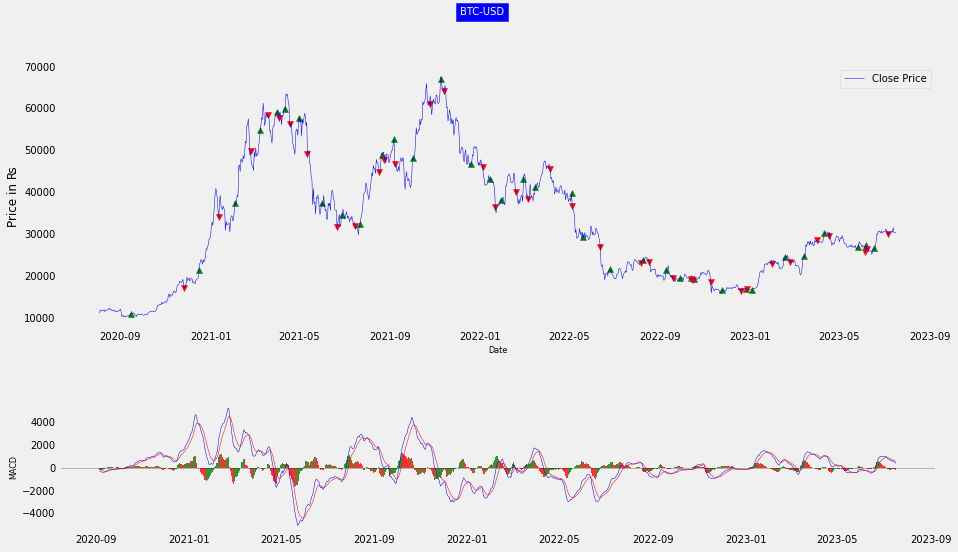

In [16]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()